## Dataset source: 
 https://www.kaggle.com/dansbecker/aer-credit-card-data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Import CSV data using pandas
data = pd.read_csv('./AER_credit_card_data.csv')

In [41]:
# View first 5 rows
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [42]:
# View last 5 rows
data.tail()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1314,yes,0,33.58333,4.566,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.192,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.600,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.700,0.008999,26.996670,no,yes,0,60,1,7
1318,yes,0,48.25000,3.700,0.111619,344.157500,yes,no,2,2,1,0


In [43]:
# Get the number of rows and columns of data
data.shape

(1319, 12)

## Data Description

    card: Dummy variable, 1 if application for credit card accepted, 0 if not
    reports: Number of major derogatory reports
    age: Age n years plus twelfths of a year
    income: Yearly income (divided by 10,000)
    share: Ratio of monthly credit card expenditure to yearly income
    expenditure: Average monthly credit card expenditure
    owner: 1 if owns their home, 0 if rent
    selfempl: 1 if self employed, 0 if not.
    dependents: 1 + number of dependents
    months: Months living at current address
    majorcards: Number of major credit cards held
    active: Number of active credit accounts

In [44]:
# Move card column to the end, no functional benefit. Only for visual purpose (personal preference)
old_columns = list(data.columns)
new_columns = old_columns[1:] + [old_columns[0]]
data = data[new_columns]

In [45]:
data.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
0,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,yes
1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,yes
2,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,yes
3,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,yes
4,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,yes


In [48]:
# Get info about datatypes of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null object
selfemp        1319 non-null object
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
card           1319 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [49]:
# Get description of numeric columns
data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [50]:
# Check dataframe for null values
data.isna().sum()

reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
card           0
dtype: int64

In [58]:
# Inspect non-numeric columns
for col in data.select_dtypes('object'):
    print(f'For column {col}')
    print(data[col].value_counts())
    print('\n')

For column owner
no     738
yes    581
Name: owner, dtype: int64


For column selfemp
no     1228
yes      91
Name: selfemp, dtype: int64


For column card
yes    1023
no      296
Name: card, dtype: int64




In [61]:
# Convert non-numeric columns into numeric (1/0)
for col in data.select_dtypes('object'):
    data[col] = data[col].map(lambda x: 1 if x == 'yes' else 0)

In [62]:
data.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1
1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
2,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1
3,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
4,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
reports        1319 non-null int64
age            1319 non-null float64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null int64
selfemp        1319 non-null int64
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
card           1319 non-null int64
dtypes: float64(4), int64(8)
memory usage: 123.8 KB


In [68]:
# Check if duplicate rows present
data.drop_duplicates(inplace=False).shape

(1319, 12)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
# Convert into training and test set
X = data.drop(['card'], axis=1)
y = data['card']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [78]:
X_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
466,0,29.00000,2.5000,0.526396,1096.65700,0,0,0,12,1,14
1304,1,39.08333,3.4224,0.029100,82.65916,1,0,0,41,1,12
765,0,20.16667,2.1000,0.153850,269.15330,0,0,1,27,0,6
199,0,49.41667,2.4000,0.044380,88.59250,0,1,0,14,1,6
1008,3,34.75000,2.6700,0.000449,0.00000,0,0,0,51,1,25


In [79]:
X_test.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
791,0,33.25000,3.0,0.376190,940.3925,1,0,2,97,1,4
363,0,61.00000,1.5,0.268517,335.5625,1,0,1,372,1,24
813,0,25.91667,2.4,0.107870,215.7392,0,0,0,150,1,18
1095,0,33.25000,3.7,0.000324,0.0000,1,0,2,72,1,0
291,2,26.83333,2.6,0.000462,0.0000,0,0,0,12,1,9


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
# Train and evaluate on DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
preds = tree.predict(X_test)
accuracy_score(y_test, preds)

0.9747474747474747

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 88,   5],
       [  5, 298]])

In [83]:
# Perform hyperparameter tuning for DecisionTreeClassifier
new_tree = DecisionTreeClassifier(max_depth = 5)
new_tree.fit(X_train, y_train)
preds = new_tree.predict(X_test)
accuracy_score(y_test, preds)

0.9772727272727273

In [85]:
confusion_matrix(y_test, preds)

array([[ 92,   1],
       [  8, 295]])

In [86]:
# More hyperparameter tuning
new_tree_2 = DecisionTreeClassifier(max_depth = 5, max_features = 5)
new_tree_2.fit(X_train, y_train)
preds = new_tree_2.predict(X_test)
accuracy_score(y_test, preds)

0.9797979797979798

In [87]:
confusion_matrix(y_test, preds)

array([[ 93,   0],
       [  8, 295]])

Fontconfig error: Cannot load default config file



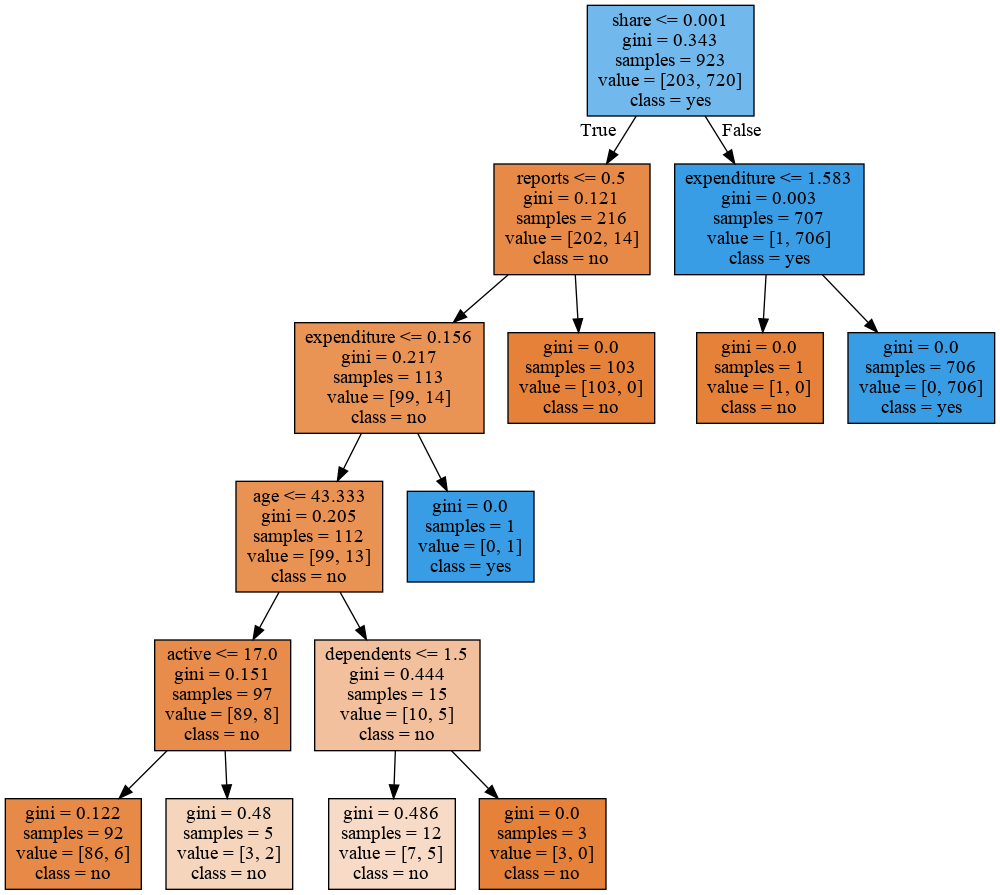

In [113]:
# Plot Decision Tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree = new_tree_2, 
                out_file = dot_data, 
                filled = True, feature_names = X.columns, class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
vis_tree = Image(graph.create_png())
display(vis_tree)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Train and evaluate on RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
accuracy_score(y_test, preds)

0.9772727272727273

In [91]:
confusion_matrix(y_test, preds)

array([[ 93,   0],
       [  9, 294]])

In [96]:
# Train and evaluate on RandomForestClassifier
new_rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_leaf = 5)
new_rf.fit(X_train, y_train)
preds = new_rf.predict(X_test)
accuracy_score(y_test, preds)

0.9772727272727273

In [97]:
confusion_matrix(y_test, preds)

array([[ 93,   0],
       [  9, 294]])

In [138]:
# Prediction for new user
new_user_data = {
    'reports': 0,
    'age': 23,
    'income': 4,
    'share': 0.0005,
    'expenditure': 0.05,
    'owner': 1,
    'selfemp': 0,
    'dependents': 3,
    'months': 120,
    'majorcards': 1,
    'active': 1
}

new_user_pred = new_tree_2.predict(pd.DataFrame(new_user_data, index=['1']))
print(new_user_pred)
# 1 means approved, 0 means rejected

[0]
